In [2]:
import pandas as pd
dt=pd.read_csv('daily-min-temperatures.csv',parse_dates=['Date'],index_col='Date')
dt.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


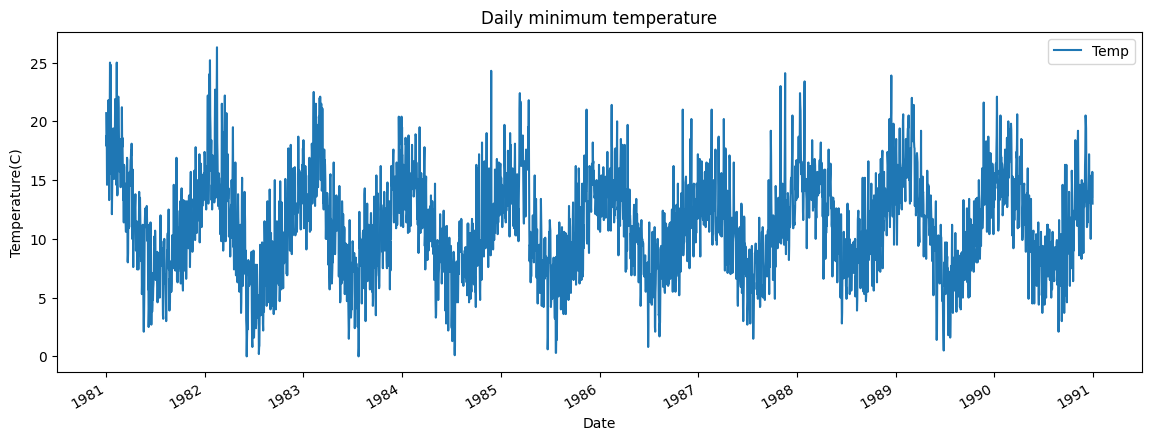

In [3]:
import matplotlib.pyplot as plt
import numpy as np

dt.plot(title='Daily minimum temperature',figsize=(14,5))
plt.xlabel('Date')
plt.ylabel('Temperature(C)')
plt.show()

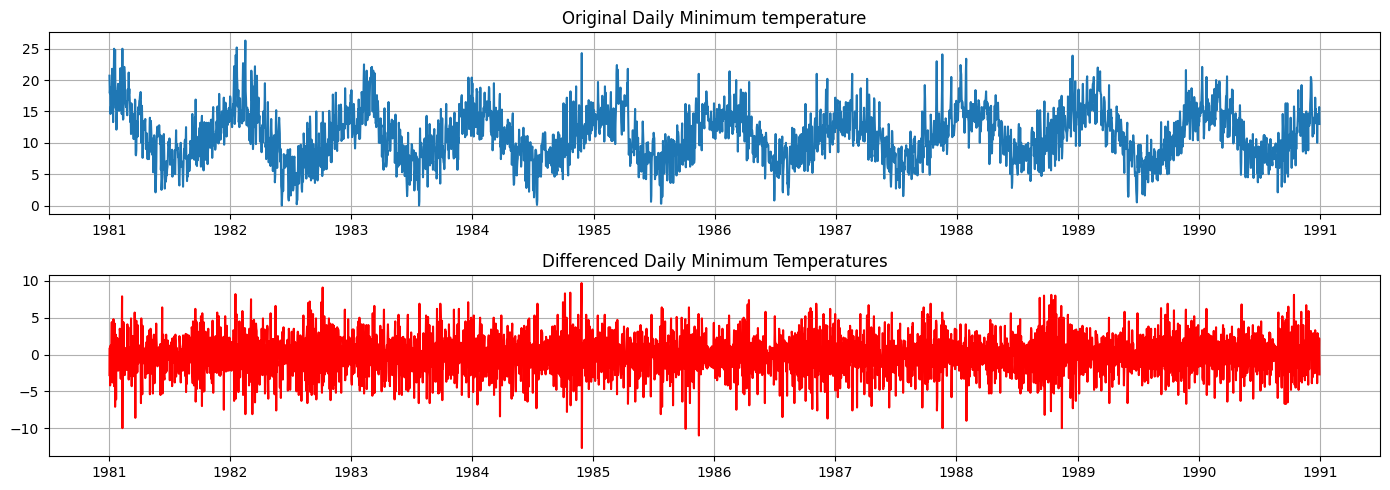

In [4]:
series=pd.read_csv('daily-min-temperatures.csv',header=0,index_col=0,parse_dates=True)

differenced_series=series.diff(periods=1)
plt.figure(figsize=(14,5))
plt.subplot(2,1,1)
plt.plot(series,label='Original Series')
plt.title('Original Daily Minimum temperature')
plt.grid()

plt.subplot(2,1,2)
plt.plot(differenced_series,label='Differenced Series',color='red')
plt.title('Differenced Daily Minimum Temperatures')
plt.grid()

plt.tight_layout()
plt.show()

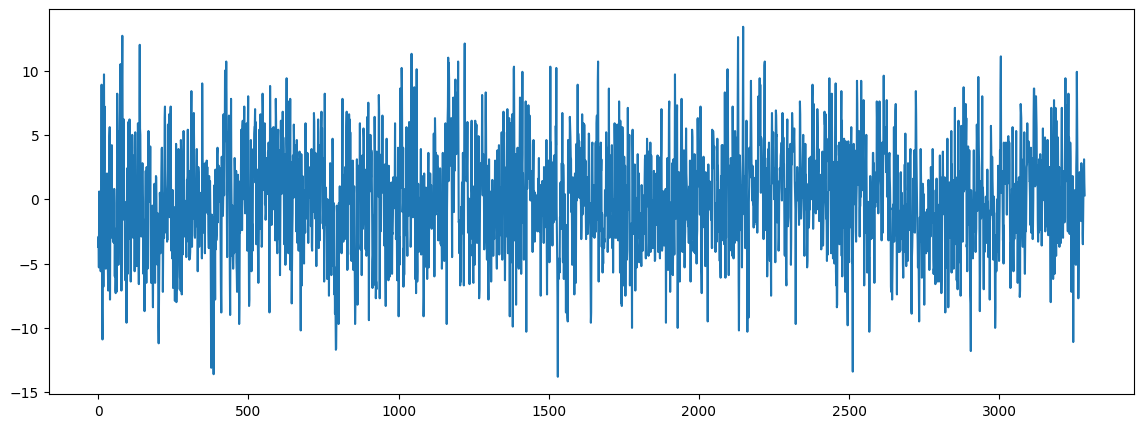

In [5]:
x=series.values
diff=list()
days_in_year=365
for i in range(days_in_year,len(x)):
    value=x[i]-x[i-days_in_year]
    diff.append(value)
plt.figure(figsize=(14,5))
plt.plot(diff)
plt.show()

In [6]:
df_temp=pd.read_csv('daily-min-temperatures.csv',parse_dates=[0],index_col=0)
df_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


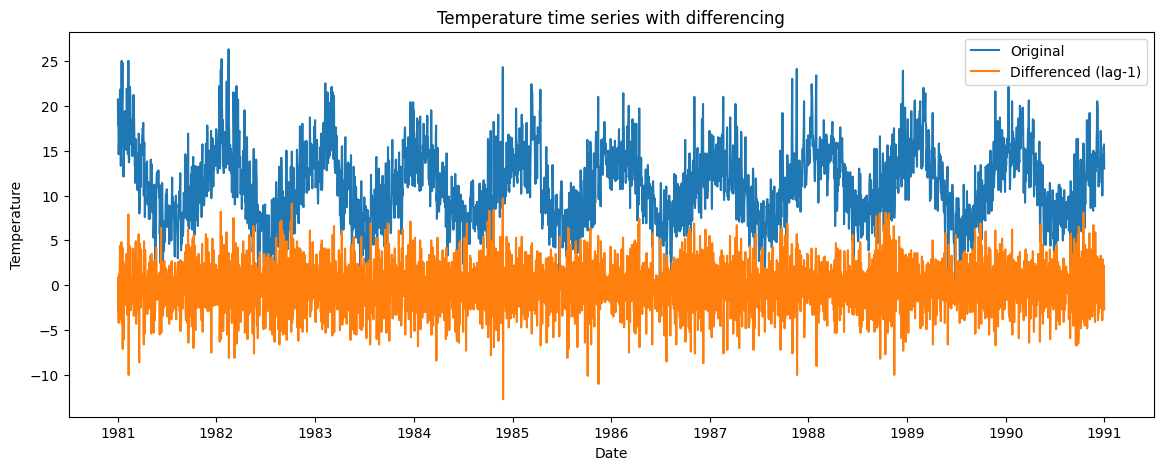

In [7]:
df_temp['diff']=df_temp['Temp'].diff(periods=1)

plt.figure(figsize=(14,5))
plt.plot(df_temp.index,df_temp['Temp'],label='Original')
plt.plot(df_temp.index,df_temp['diff'],label='Differenced (lag-1)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature time series with differencing')
plt.legend()
plt.show()

Coefficients: %s [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


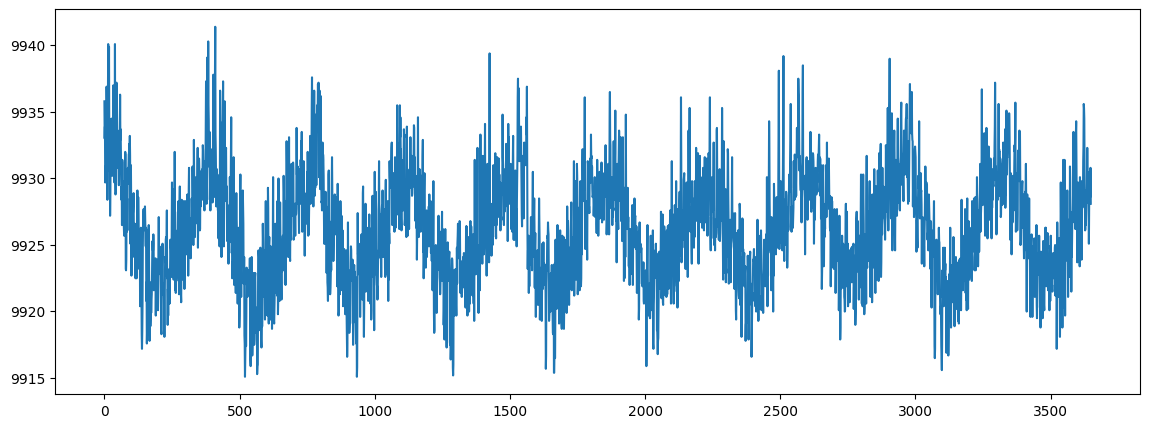

In [11]:
from numpy import polyfit

X=[i%365 for i in range(0, len(series))]
y=series.values
degree=4
coef=polyfit(X,y,degree)
print('Coefficients: %s', coef)
curve=list()
for i in range(len(X)):
    value=coef[-1]
    for d in range(degree):
        value+=X[i]**(degree-d)*coef[d]
        curve.append(value)
values=series.values
diff=list()
for i in range(len(values)):
    value=values[i]-curve[i]
    diff.append(value)
plt.figure(figsize=(14,5))
plt.plot(diff)
plt.show()